## Vibration of Single Degree of Freedom systems with damping

Jupyter notebook for numerical solution of a damped single degree of freedom system using Euler's method for the equation:
\begin{gather*}
 m\ddot{x}\ + c\dot{x} + kx = 0 \\
x(t=0)=0.05 \quad \text{and} \quad \dot{x}(t=0)=0 \\
m=5kg \quad k=30000 N/m \quad c=50 \\
\end{gather*}


Let $\dot{x} = z$ and $\ddot{x} = \dot{z} $

$ x(0)=0.05$ and $\ddot{x}(t=0) = \dot{z}(t=0) = 0 $

The equation can be writen:

$m\dot{z}\ + cz + kx = 0$

Two sets of equaitons are obtained as follows:

- $m\dot{z}\ + cz + kx = 0  \quad \quad z(t=0)=0$
- $\ddot{x} = z \quad \quad x(t=0) = 0.05 $

Make $\dot{z}$ and $\dot{x}$ the subject of the equations to get the gradient function

\begin{gather*}
f_1 = \dot{z} = -\left( \frac{cz + kx}{m} \right) \\
f_2 = \dot{x} = z
\end{gather*}
Applying Euler's Method
\begin{gather*}
z_{i+1} = z_i + f_1(x_i, z_i, t_i)h = z - \left( \frac{cz + kx}{m} \right) h \\
x_{i+1} = x_i + f_2(x_i, z_i, t_i)h = x_i + z_i h
\end{gather*}

In [1]:
import matplotlib.pyplot as plt
import math
import numpy as np

# Imports to enable scaled vector graphics
# %matplotlib notebook
%matplotlib inline
import matplotlib_inline
matplotlib_inline.backend_inline.set_matplotlib_formats('svg')

In [2]:
class SDOFOscillator:

    def __init__(self, m, c, k, h=0.0001, time_duration=2 ):
        self.m = m
        self.c = c
        self.k = k
        self.h = h
        self.duration = time_duration
        self.x0 = 0.05
        self.z0 = 0.0
        self.x0_prime = 0.0
        self.t = []
        self.x = []
        self.z = []
        self.z_prime = []
        self.x_true = []
        self.time_true = []


    def calc_z(self, zi, xi):
        return zi - (((self.c * zi) + (self.k * xi)) * self.h / self.m)

    def calc_z_prime(self, zi, xi):
        return -1.0 * (((self.c * zi) + (self.k * xi)) * self.h / self.m)

    def calc_x(self, xi, zi):
        return xi + (zi * self.h)


    def compute_analytical(self):
        wn = math.sqrt(self.k / self.m)
        chi = self.c / (2 * self.m * wn)
        wd = wn * math.sqrt(1 - (chi * chi))
        A = self.x0
        B = (self.x0_prime + (chi * wn * self.x0)) / wd

        xt = []

        time = np.arange(0.0, self.duration, 0.0001)

        for i in range(len(time)):
            xt_new = math.exp(-chi * wn * time[i]) * \
                     (A * math.cos(wd * time[i]) + B * math.sin(wd * time[i]))

            xt.append(xt_new)

        self.x_true = xt
        self.time_true = time


    def compute_euler(self):
        self.t = np.arange(0.0, self.duration, self.h)
        print(f"Euler duration {self.duration}")
        print(f"Euler time step {self.h}")
        print(f"Euler c {self.c}")
        self.x = [self.x0]
        self.z = [self.z0]
        self.z_prime = [0]

        for i in range(0, len(self.t) - 1):
            z_new = self.calc_z(self.z[i], self.x[i])
            x_new = self.calc_x(self.x[i], self.z[i])
            # t_new = self.t[i] + self.h

            self.z.append(z_new)
            self.x.append(x_new)

            if i == 0:
                self.z_prime[0] = (self.calc_z_prime(self.z[i], self.x[i]))
            self.z_prime.append(self.calc_z_prime(self.z[i], self.x[i]))

    def set_x0(self, x0):
        self.x0 = x0

    def set_z0(self, z0):
        self.z0 = z0

    def get_x(self):
        return self.x

    def get_t(self):
        return self.t

    def get_x_true(self):
        return self.x_true

    def get_time_true(self):
        return self.time_true

    def plot_values(self):
        plt.figure(figsize=(12, 4))
        plt.rcParams["font.family"] = 'Times New Roman'
        plt.plot(self.t, self.x, label='Euler\'s',linewidth=0.8)
        plt.plot(self.time_true, self.x_true, label='Analytical',linewidth=0.8)
        plt.legend()
        plt.show()

Euler duration 1
Euler time step 0.001
Euler c 50


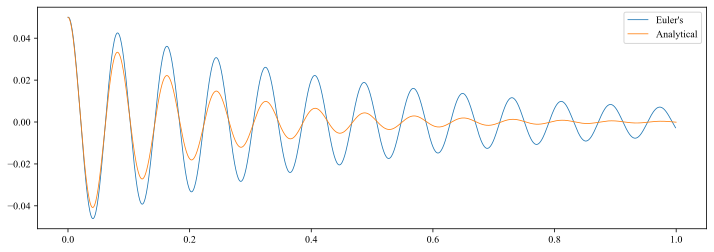

In [3]:
# h: is the variable determining the timestep. Smaller timesteps give better results. See subsequent cells
# time_duration : how long the vibration took place after initialization

# Using a large timestep
oscillator = SDOFOscillator(m=5, c=50, k=30000, h=0.001, time_duration=1)
oscillator.compute_analytical()
oscillator.compute_euler()
oscillator.plot_values()

Euler duration 1
Euler time step 0.0001
Euler c 50


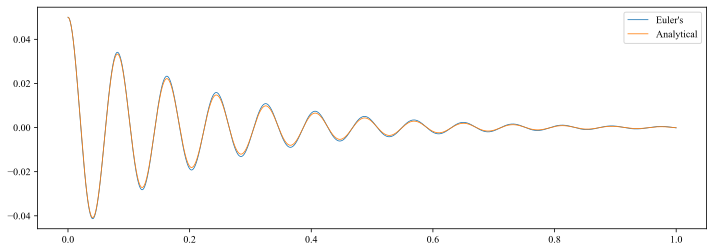

In [4]:
# Using a small timestep
oscillator = SDOFOscillator(m=5, c=50, k=30000, h=0.0001, time_duration=1)
oscillator.compute_analytical()
oscillator.compute_euler()
oscillator.plot_values()